# _Linear Regression Lab 2 — Kevin Wong_#

In [1]:
%load_ext rpy2.ipython
import rpy2.rinterface 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from scipy.stats import t as tdist

**Dataset Context**

We revisit the Bike Sharing dataset from Lab 1.  

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The dataset titled bike_share.csv contains 10,886 hourly records of rental data spanning two years for the Capital Bikeshare program in Washington, D.C. This dataset contains observations from the following variables:
- season: 1 = spring, 2 = summer, 3 = fall, 4 = winter
- weather: 1 = nice, 2 = cloudy, 3 = rainy, 4 = stormy
- temp: outdoor temperature (measured in Fahrenheit)
- humidity: relative humidity (as a percentage)
- windspeed: wind speeds (measured in miles per hour)
- count: the number of bike rentals in a given hourly period

Interest lies in understanding which factors influence bike rental demand – and how they influence bike rental demand – and predicting the number of bike rentals in a given hourly period. 

**Importing Data in Python and R**

In [2]:
df = pd.read_csv("bike_share.csv") 
df.head(10)

,season,weather,temp,humidity,windspeed,count
0,1,1,49.712,81,0.0000,16
1,1,1,48.236,80,0.0000,40
2,1,1,48.236,80,0.0000,32
3,1,1,49.712,75,0.0000,13
4,1,1,49.712,75,0.0000,1
5,1,2,49.712,75,6.0032,1
6,1,1,48.236,80,0.0000,2
7,1,1,46.760,86,0.0000,3
8,1,1,49.712,75,0.0000,8
9,1,1,55.616,76,0.0000,14


In [3]:
%%R

df <- read.csv("bike_share.csv", header = T)
df[1:10,]

   season weather   temp humidity windspeed count
1       1       1 49.712       81    0.0000    16
2       1       1 48.236       80    0.0000    40
3       1       1 48.236       80    0.0000    32
4       1       1 49.712       75    0.0000    13
5       1       1 49.712       75    0.0000     1
6       1       2 49.712       75    6.0032     1
7       1       1 48.236       80    0.0000     2
8       1       1 46.760       86    0.0000     3
9       1       1 49.712       75    0.0000     8
10      1       1 55.616       76    0.0000    14


**Segmenting Columns**

In [4]:
# response var.
count = df["count"]

# explanatory var candidates
temp = df["temp"]
hmd = df["humidity"]
ws = df["windspeed"]

In [5]:
%%R
count <- df$count

temp <- df$temp
hmd <- df$humidity
ws <- df$windspeed

***
**A) Simple Linear Regression and Inference — Bike Rental Count vs. Temperature**

In [6]:
# using an automated modeling function to fit a model
model = smf.ols("count ~ temp", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     2006.
Date:                Tue, 25 Sep 2018   Prob (F-statistic):               0.00
Time:                        23:21:25   Log-Likelihood:                -71125.
No. Observations:               10886   AIC:                         1.423e+05
Df Residuals:                   10884   BIC:                         1.423e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -156.9856      7.945    -19.759      0.000    -172.560    -141.412
temp           5.0947      0.114     44.783      0.000       4.872       5.318
==============================================================================
Omnibus:                     1871.687   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3221.966
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       4.434   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
%%R
model <- lm(count ~ temp)
s <- summary(model)
s


Call:
lm(formula = count ~ temp)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.32 -112.36  -33.36   78.98  741.44 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -156.9856     7.9451  -19.76   <2e-16 ***
temp           5.0947     0.1138   44.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 166.5 on 10884 degrees of freedom
Multiple R-squared:  0.1556,	Adjusted R-squared:  0.1555 
F-statistic:  2006 on 1 and 10884 DF,  p-value: < 2.2e-16



$\hat\beta_0$: -156.9856 <br>
$\hat\beta_1$: 5.0947 <br>

The $\hat\beta_1$ estimate can be interpreted as the expected increase in the response Count for every unit increase in Temperature — essentially the slope of our simple regression line. Thus for every degree hotter the hour is, our model predicts about 5 additional bike rentals to occur.

<b>Hypothesis Testing</b><br>
**$H_0:\beta_1 = 0$** vs. **$H_A:\beta_1 \neq 0 $ **

In [8]:
beta0_hat = model.params[0]
beta1_hat = model.params[1]

# according to the maximum-likelihood estimation for sigma 
sigma_hat = np.sqrt(model.mse_resid)

n = np.shape(df)[0]
sxx = n * np.var(temp)

# test statistic assuming the null hypothesis 
t = (beta1_hat - 0) / (sigma_hat / np.sqrt(sxx))

# resulting p-value
p_value = 2 * (1 - tdist.cdf(np.abs(t), df = n - 2))
print("Estimated Sigma: ", sigma_hat, "\nSxx: ", sxx, "\nTest Statistic: ", t, "\nP-value: ", p_value)

Estimated Sigma:  166.464154717 
Sxx:  2141044.08284 
Test Statistic:  44.7831359626 
P-value:  0.0


A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so we reject the null hypothesis.  Therefore with a p-value of 0, we have very strong evidence to conclude that outside temperature does in fact significantly influence hourly bike rental counts.

***
**B) Simple Linear Regression and Inference — Bike Rental Count vs. Relative Humidity**

In [9]:
# using an automated modeling function to fit a model
model = smf.ols("count ~ hmd", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     1219.
Date:                Tue, 25 Sep 2018   Prob (F-statistic):          2.92e-253
Time:                        23:21:26   Log-Likelihood:                -71468.
No. Observations:               10886   AIC:                         1.429e+05
Df Residuals:                   10884   BIC:                         1.430e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    376.4456      5.545     67.890      0.000     365.577     387.315
hmd           -2.9873      0.086    -34.915      0.000      -3.155      -2.820
==============================================================================
Omnibus:                     2068.515   Durbin-Watson:                   0.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3709.739
Skew:                           1.210   Prob(JB):                         0.00
Kurtosis:                       4.525   Cond. No.                         218.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
%%R
model <- lm(count ~ hmd)
s <- summary(model)
s


Call:
lm(formula = count ~ hmd)

Residuals:
    Min      1Q  Median      3Q     Max 
-375.45 -120.49  -41.86   82.15  734.73 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 376.44561    5.54494   67.89   <2e-16 ***
hmd          -2.98727    0.08556  -34.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 171.8 on 10884 degrees of freedom
Multiple R-squared:  0.1007,	Adjusted R-squared:  0.1006 
F-statistic:  1219 on 1 and 10884 DF,  p-value: < 2.2e-16



$\hat\beta_0$: 376.4456 <br>
$\hat\beta_1$: -2.9873 <br>

The $\hat\beta_1$ estimate is interpreted similar to the last case, except now it describes the expected change in the count of hourly bike rentals for each additional increase in relative humidity.  For each percentage increase in relative humidity, our model predicts roughly 3 less hourly rentals.  

<b>Hypothesis Testing</b><br>
**$H_0:\beta_1 = 0$** vs. **$H_A:\beta_1 \neq 0 $ **

In [11]:
beta0_hat = model.params[0]
beta1_hat = model.params[1]

# according to the maximum-likelihood estimation for sigma 
sigma_hat = np.sqrt(model.mse_resid)

n = np.shape(df)[0]
sxx = n * np.var(hmd)

# test statistic assuming the null hypothesis 
t = (beta1_hat - 0) / (sigma_hat / np.sqrt(sxx))

# resulting p-value
p_value = 2 * (1 - tdist.cdf(np.abs(t), df = n - 2))
print("Estimated Sigma: ", sigma_hat, "\nSxx: ", sxx, "\nTest Statistic: ", t, "\nP-value: ", p_value)

Estimated Sigma:  171.787411184 
Sxx:  4031491.66416 
Test Statistic:  -34.9153032923 
P-value:  0.0


Again, we observe a p-value of 0.  This lends strong evidence to reject the null hypothesis that the $\beta_1 = 0$ and side with the alternative hypothesis that $\beta_1 \neq 0$.  We interpret this to mean that increasing humidity does indeed have a negative effect on hourly bike rentals — the results we have are likely not a fluke just because of our specific sample.

***
**C) Simple Linear Regression and Inference — Bike Rental Count vs. Windspeed**

In [12]:
# using an automated modeling function to fit a model
model = smf.ols("count ~ ws", data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     113.0
Date:                Tue, 25 Sep 2018   Prob (F-statistic):           2.90e-26
Time:                        23:21:26   Log-Likelihood:                -71989.
No. Observations:               10886   AIC:                         1.440e+05
Df Residuals:                   10884   BIC:                         1.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    162.7876      3.212     50.682      0.000     156.492     169.084
ws             2.2491      0.212     10.630      0.000       1.834       2.664
==============================================================================
Omnibus:                     2086.612   Durbin-Watson:                   0.322
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3633.799
Skew:                           1.247   Prob(JB):                         0.00
Kurtosis:                       4.338   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
%%R
model <- lm(count ~ ws)
s <- summary(model)
s


Call:
lm(formula = count ~ ws)

Residuals:
    Min      1Q  Median      3Q     Max 
-274.74 -145.29  -48.53   92.48  807.21 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 162.7876     3.2120   50.68   <2e-16 ***
ws            2.2491     0.2116   10.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 180.2 on 10884 degrees of freedom
Multiple R-squared:  0.01028,	Adjusted R-squared:  0.01018 
F-statistic:   113 on 1 and 10884 DF,  p-value: < 2.2e-16



$\hat\beta_0$: 162.7876 <br>
$\hat\beta_1$: 2.2491 <br>

The $\hat\beta_1$ estimate for windspeed is small and positive.  This suggests that each additional mile per hour of measured windspeed can expect a little over 2 more bike rentals per hour. 

<b>Hypothesis Testing</b><br>
**$H_0:\beta_1 = 0$** vs. **$H_A:\beta_1 \neq 0 $ **

In [14]:
beta0_hat = model.params[0]
beta1_hat = model.params[1]

# according to the maximum-likelihood estimation for sigma 
sigma_hat = np.sqrt(model.mse_resid)

n = np.shape(df)[0]
sxx = n * np.var(ws)

# test statistic assuming the null hypothesis 
t = (beta1_hat - 0) / (sigma_hat / np.sqrt(sxx))

# resulting p-value
p_value = 2 * (1 - tdist.cdf(np.abs(t), df = n - 2))
print("Estimated Sigma: ", sigma_hat, "\nSxx: ", sxx, "\nTest Statistic: ", t, "\nP-value: ", p_value)

Estimated Sigma:  180.219629765 
Sxx:  725590.505352 
Test Statistic:  10.6302711381 
P-value:  0.0


Again, we observe a p-value of 0 which lends strong evidence to reject the null hypothesis that windspeed has no effect on bike rentals.  If it were the case that windspeed has no effect on bike rentals and the true $\beta_1$  parameter was 0, the likelihood that we would get the data and statistical results we have are astronomically small.  Consequently, we can say that windspeed certainly has positive effect on windspeed (although out of the three tested explanatory variables, it has the "least" effect due to the magnitude of the $\beta_1$ estimate).

***
** D) Scatterplots with Confidence and Prediction Intervals on the Line of Best Fit  **

*** Bike Rental Count vs. Temperature ***

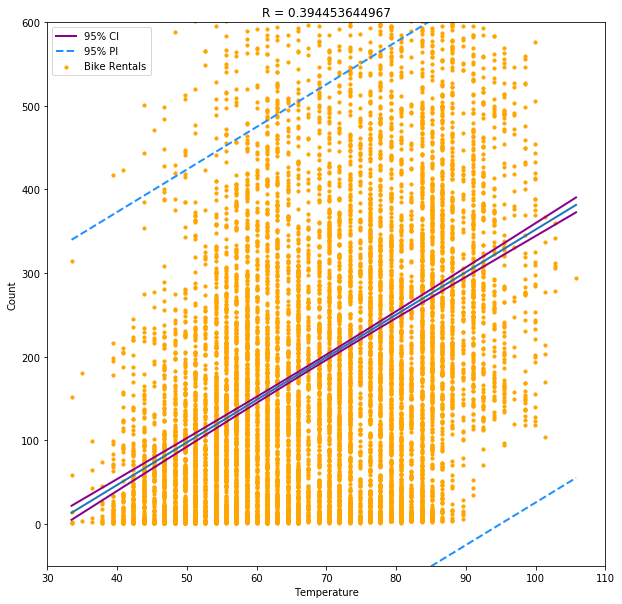

In [15]:
# refit the model for temperature data
model = smf.ols("count ~ temp", data = df).fit()
beta0_hat = model.params[0]
beta1_hat = model.params[1]

mu_hat = beta0_hat + beta1_hat * temp

# manually calculate 100 evenly-spaced values of y based on the regression line formula
x_max = np.max(temp)
x_min = np.min(temp)

x_values = np.linspace(x_min, x_max, 100)
y_values = [-156.99+5.09*x for x in x_values]

# generate a 95% confidence interval on the line of best fit
sxx = n * np.var(temp)
sigma_hat_lse = np.sqrt(np.sum((count - mu_hat)**2)/(n-2))
std_error_mu = sigma_hat_lse * np.sqrt((1/n) + ((x_values-np.mean(temp))**2/sxx))
crit_val = tdist.ppf(0.975, df = n - 2)

low_CL = y_values - crit_val * std_error_mu
upp_CL = y_values + crit_val * std_error_mu

# generate a 95% prediction interval for y
se_yp = sigma_hat_lse * np.sqrt(1 + (1/n) + ((x_values-np.mean(temp))**2/sxx))
low_PL = y_values - crit_val * se_yp
upp_PL = y_values + crit_val * se_yp

# plotting the data, and line of best fit with confidence and prediction intervals
plt.figure(figsize=(10,10))
plt.scatter(temp, count, c="orange", s=10, label = "Bike Rentals")
plt.plot(x_values, y_values, lw=2)
plt.xlabel("Temperature")
plt.ylabel("Count")
temp_corr = np.corrcoef(temp, count)[1,0]
plt.title("R = " + str(temp_corr))

plt.plot(x_values, low_CL, '-', color = "darkmagenta", linewidth = 2, label = "95% CI")
plt.plot(x_values, upp_CL, '-', color = "darkmagenta", linewidth = 2)

plt.plot(x_values, low_PL, '--', color = "dodgerblue", linewidth = 2, label = "95% PI")
plt.plot(x_values, upp_PL, '--', color = "dodgerblue", linewidth = 2)

plt.axis([30,110,-50,600])
plt.legend()

plt.show()

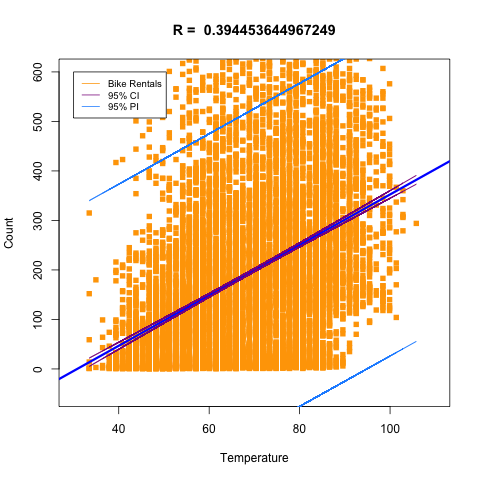

In [16]:
%%R

model <- lm(count ~ temp)
confidence <- data.frame(predict(object = model, newdata = df, interval = "confidence", level = 0.95))
prediction <- data.frame(predict(object = model, newdata = df, interval = "prediction", level = 0.95))


plot(temp, count, xlab = "Temperature", ylab = "Count", 
     main = paste("R = ",cor(temp,count)), col = "orange", pch=15, xlim=c(30,110), ylim=c(-50,600))
abline(model, col = "blue", lwd = 3)
lines(temp, confidence$upr, col="darkmagenta")
lines(temp, confidence$lwr, col="darkmagenta")
lines(temp, prediction$upr, col="dodgerblue")
lines(temp, prediction$lwr, col="dodgerblue")
legend(30, 600, legend=c("Bike Rentals", "95% CI", "95% PI"),
       col=c("orange","darkmagenta","dodgerblue"), lty=1, cex=.8)

*** Bike Rental Count vs. Relative Humidity ***

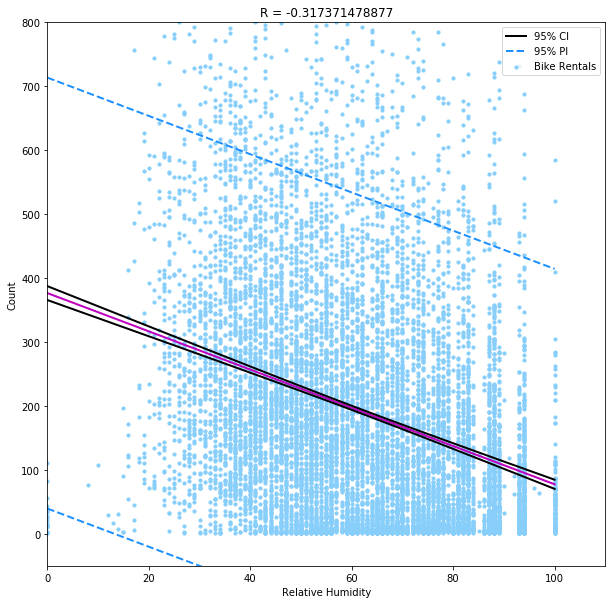

In [17]:
# refit the model for humidity data
model = smf.ols("count ~ hmd", data = df).fit()
beta0_hat = model.params[0]
beta1_hat = model.params[1]

mu_hat = beta0_hat + beta1_hat * hmd

# manually calculate 100 evenly-spaced values of y based on the regression line formula
x_max = np.max(hmd)
x_min = np.min(hmd)

x_values = np.linspace(x_min, x_max, 100)
y_values = [376.45-2.99*x for x in x_values]

# generate a 95% confidence interval on the line of best fit
sxx = n * np.var(hmd)
sigma_hat_lse = np.sqrt(np.sum((count - mu_hat)**2)/(n-2))
std_error_mu = sigma_hat_lse * np.sqrt((1/n) + ((x_values-np.mean(hmd))**2/sxx))
crit_val = tdist.ppf(0.975, df = n - 2)

low_CL = y_values - crit_val * std_error_mu
upp_CL = y_values + crit_val * std_error_mu

# generate a 95% prediction interval for y
se_yp = sigma_hat_lse * np.sqrt(1 + (1/n) + ((x_values-np.mean(hmd))**2/sxx))
low_PL = y_values - crit_val * se_yp
upp_PL = y_values + crit_val * se_yp

# plotting the data, and line of best fit with confidence and prediction intervals
plt.figure(figsize=(10,10))
plt.scatter(hmd, count, c="lightskyblue", s=10, label = "Bike Rentals")
plt.plot(x_values, y_values, lw=2, c="m")
plt.xlabel("Relative Humidity")
plt.ylabel("Count")
hmd_corr = np.corrcoef(hmd, count)[1,0]
plt.title("R = " + str(hmd_corr))

plt.plot(x_values, low_CL, '-', color = "k", linewidth = 2, label = "95% CI")
plt.plot(x_values, upp_CL, '-', color = "k", linewidth = 2)

plt.plot(x_values, low_PL, '--', color = "dodgerblue", linewidth = 2, label = "95% PI")
plt.plot(x_values, upp_PL, '--', color = "dodgerblue", linewidth = 2)

plt.axis([0,110,-50,800])
plt.legend()

plt.show()

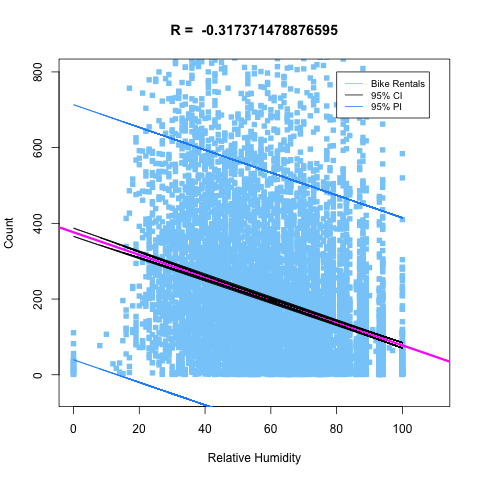

In [18]:
%%R

model <- lm(count ~ hmd)
confidence <- data.frame(predict(object = model, newdata = df, interval = "confidence", level = 0.95))
prediction <- data.frame(predict(object = model, newdata = df, interval = "prediction", level = 0.95))


plot(hmd, count, xlab = "Relative Humidity", ylab = "Count", 
     main = paste("R = ",cor(hmd,count)), col = "lightskyblue", pch=15, xlim=c(0,110), ylim=c(-50,800))
abline(model, col = "magenta", lwd = 3)
lines(hmd, confidence$upr, col="black")
lines(hmd, confidence$lwr, col="black")
lines(hmd, prediction$upr, col="dodgerblue")
lines(hmd, prediction$lwr, col="dodgerblue")
legend(80, 800, legend=c("Bike Rentals", "95% CI", "95% PI"),
       col=c("lightskyblue","black","dodgerblue"), lty=1, cex=.8)

*** Bike Rental Count vs. Windspeed ***

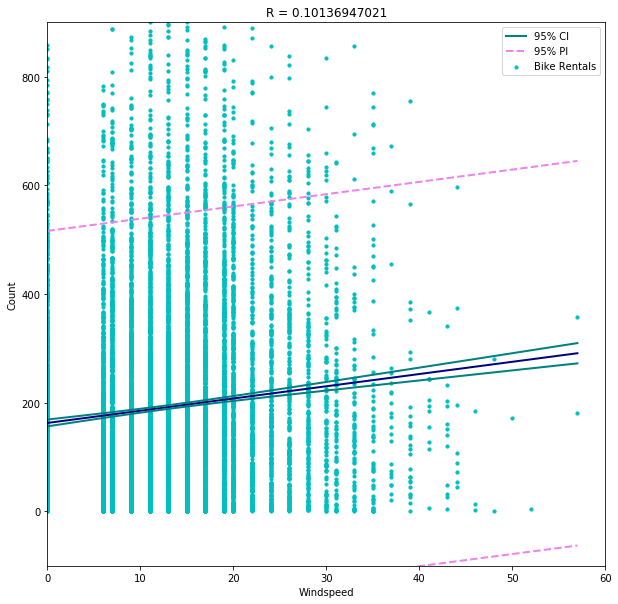

In [19]:
# refit the model for windspeed data
model = smf.ols("count ~ ws", data = df).fit()
beta0_hat = model.params[0]
beta1_hat = model.params[1]

mu_hat = beta0_hat + beta1_hat * ws

# manually calculate 100 evenly-spaced values of y based on the regression line formula
x_max = np.max(ws)
x_min = np.min(ws)

x_values = np.linspace(x_min, x_max, 100)
y_values = [162.78+2.25*x for x in x_values]

# generate a 95% confidence interval on the line of best fit
sxx = n * np.var(ws)
sigma_hat_lse = np.sqrt(np.sum((count - mu_hat)**2)/(n-2))
std_error_mu = sigma_hat_lse * np.sqrt((1/n) + ((x_values-np.mean(ws))**2/sxx))
crit_val = tdist.ppf(0.975, df = n - 2)

low_CL = y_values - crit_val * std_error_mu
upp_CL = y_values + crit_val * std_error_mu

# generate a 95% prediction interval for y
se_yp = sigma_hat_lse * np.sqrt(1 + (1/n) + ((x_values-np.mean(ws))**2/sxx))
low_PL = y_values - crit_val * se_yp
upp_PL = y_values + crit_val * se_yp

# plotting the data, and line of best fit with confidence and prediction intervals
plt.figure(figsize=(10,10))
plt.scatter(ws, count, c="c", s=10, label = "Bike Rentals")
plt.plot(x_values, y_values, lw=2, c="navy")
plt.xlabel("Windspeed")
plt.ylabel("Count")
ws_corr = np.corrcoef(ws, count)[1,0]
plt.title("R = " + str(ws_corr))

plt.plot(x_values, low_CL, '-', color = "teal", linewidth = 2, label = "95% CI")
plt.plot(x_values, upp_CL, '-', color = "teal", linewidth = 2)

plt.plot(x_values, low_PL, '--', color = "violet", linewidth = 2, label = "95% PI")
plt.plot(x_values, upp_PL, '--', color = "violet", linewidth = 2)

plt.axis([0,60,-100,900])
plt.legend()

plt.show()

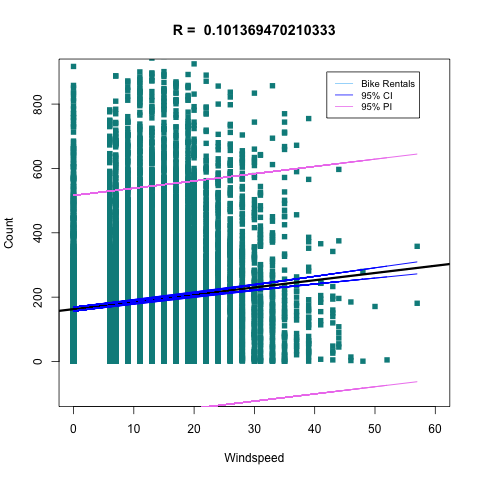

In [20]:
%%R

model <- lm(count ~ ws)
confidence <- data.frame(predict(object = model, newdata = df, interval = "confidence", level = 0.95))
prediction <- data.frame(predict(object = model, newdata = df, interval = "prediction", level = 0.95))


plot(ws, count, xlab = "Windspeed", ylab = "Count", 
     main = paste("R = ",cor(ws,count)), col = "darkcyan", pch=15, xlim=c(0,60), ylim=c(-100,900))
abline(model, col = "black", lwd = 3)
lines(ws, confidence$upr, col="blue")
lines(ws, confidence$lwr, col="blue")
lines(ws, prediction$upr, col="violet")
lines(ws, prediction$lwr, col="violet")
legend(42, 900, legend=c("Bike Rentals", "95% CI", "95% PI"),
       col=c("lightskyblue","blue","violet"), lty=1, cex=.8)

---
** E) Specific Predictions with Prediction Intervals **

<i> Predict hourly rentals when the outside temperature is 70 degrees Fahrenheit:


In [21]:
model = smf.ols("count ~ temp", data = df).fit()
beta0_hat = model.params[0]
beta1_hat = model.params[1]
mu_hat = beta0_hat + beta1_hat * temp

x_max = np.max(temp)
x_min = np.min(temp)
x_values = np.linspace(x_min, x_max, 100)

sxx = n * np.var(temp)
sigma_hat_lse = np.sqrt(np.sum((count - mu_hat)**2)/(n-2))
crit_val = tdist.ppf(0.975, df = n - 2)
se_yp = sigma_hat_lse * np.sqrt(1 + (1/n) + ((70-np.mean(temp))**2/sxx))

yp_hat = beta0_hat + beta1_hat * 70

print("95% Prediction Upper Limit: ", yp_hat + crit_val * se_yp)
print("Predicted Hourly Rentals: ", yp_hat)
print("95% Prediction Lower Limit: ", yp_hat - crit_val * se_yp)

95% Prediction Upper Limit:  525.961724475
Predicted Hourly Rentals:  199.646512012
95% Prediction Lower Limit:  -126.668700452


In [22]:
%%R
model <- lm(count ~ temp)
predict(object = model, newdata = data.frame(temp = 70), interval = "prediction", level = 0.95)

       fit       lwr      upr
1 199.6465 -126.6687 525.9617


<i>Predict hourly rentals when the wind speed is 10 miles per hour:


In [23]:
model = smf.ols("count ~ ws", data = df).fit()
beta0_hat = model.params[0]
beta1_hat = model.params[1]
mu_hat = beta0_hat + beta1_hat * ws

x_max = np.max(ws)
x_min = np.min(ws)
x_values = np.linspace(x_min, x_max, 100)

sxx = n * np.var(ws)
sigma_hat_lse = np.sqrt(np.sum((count - mu_hat)**2)/(n-2))
std_error_mu = sigma_hat_lse * np.sqrt((1/n) + ((x_values-np.mean(ws))**2/sxx))
crit_val = tdist.ppf(0.975, df = n - 2)
se_yp = sigma_hat_lse * np.sqrt(1 + (1/n) + ((x_values-np.mean(ws))**2/sxx))

yp_hat = beta0_hat + beta1_hat * 10


print("95% Prediction Upper Limit: ", yp_hat + crit_val * np.mean(se_yp))
print("Predicted Hourly Rentals: ", yp_hat)
print("95% Prediction Lower Limit: ", yp_hat - crit_val * np.mean(se_yp))

95% Prediction Upper Limit:  538.684796085
Predicted Hourly Rentals:  185.278129509
95% Prediction Lower Limit:  -168.128537068


In [24]:
%%R
model <- lm(count ~ ws)
predict(object = model, newdata = data.frame(ws = 10), interval = "prediction", level = 0.95)

       fit       lwr      upr
1 185.2781 -168.0033 538.5595


<i>Predict hourly rentals when the relative humidity is 40%:


In [25]:
model = smf.ols("count ~ hmd", data = df).fit()
beta0_hat = model.params[0]
beta1_hat = model.params[1]
mu_hat = beta0_hat + beta1_hat * hmd

x_max = np.max(hmd)
x_min = np.min(hmd)
x_values = np.linspace(x_min, x_max, 100)

sxx = n * np.var(hmd)
sigma_hat_lse = np.sqrt(np.sum((count - mu_hat)**2)/(n-2))
std_error_mu = sigma_hat_lse * np.sqrt((1/n) + ((x_values-np.mean(hmd))**2/sxx))
crit_val = tdist.ppf(0.975, df = n - 2)
se_yp = sigma_hat_lse * np.sqrt(1 + (1/n) + ((x_values-np.mean(hmd))**2/sxx))

yp_hat = beta0_hat + beta1_hat * 40

print("95% Prediction Upper Limit: ", yp_hat + crit_val * np.mean(se_yp))
print("Predicted Hourly Rentals: ", yp_hat)
print("95% Prediction Lower Limit: ", yp_hat - crit_val * np.mean(se_yp))

95% Prediction Upper Limit:  593.746315977
Predicted Hourly Rentals:  256.954865189
95% Prediction Lower Limit:  -79.8365855992


In [26]:
%%R
model <- lm(count ~ hmd)
predict(object = model, newdata = data.frame(hmd = 40), interval = "prediction", level = 0.95)

       fit       lwr      upr
1 256.9549 -79.81519 593.7249


---
** F) Linear Regression — Bike Rental Count vs. Season (Categorical) **

In [27]:
model = smf.ols('count ~ C(season)', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     236.9
Date:                Tue, 25 Sep 2018   Prob (F-statistic):          6.16e-149
Time:                        23:21:30   Log-Likelihood:                -71701.
No. Observations:               10886   AIC:                         1.434e+05
Df Residuals:                   10882   BIC:                         1.434e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        116.3433      3.387     34.352      0.000     109.704     122.982
C(season)[T.2]    98.9081      4.769     20.740      0.000      89.560     108.256
C(season)[T.3]   118.0739      4.769     24.758      0.000     108.726     127.422
C(season)[T.4]    82.6450      4.769     17.331      0.000      73.298      91.992
==============================================================================
Omnibus:                     1896.059   Durbin-Watson:                   0.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3190.509
Skew:                           1.156   Prob(JB):                         0.00
Kurtosis:                       4.299   Cond. No.                         4.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
%%R
lm(count ~ factor(season), data = df)


Call:
lm(formula = count ~ factor(season), data = df)

Coefficients:
    (Intercept)  factor(season)2  factor(season)3  factor(season)4  
         116.34            98.91           118.07            82.65  



<i><b>Interpretation</i></b><br>
Looking at the model summary output, the intercept coefficient of 116.34 corresponds to the expected value of hourly rental count when season is 1 ie Spring.  This occurs when the other $x_i$ indicator variables are turned off and equivalent to 0.

The C(season)[T.2] through [T.4] coefficients correspond to the increase of the expected value above the baseline  season during each additional corresponding season.  Season 2 is Summer, Season 3 is Fall, and Season 4 is Winter. As shown below, these three coefficient values are the differences that are each added to the mean of season 1 (116.34) to achieve the mean hourly bike rental counts per hour of the corresponding season.   



In [29]:
df.groupby("season").mean()

,weather,temp,humidity,windspeed,count
season,,,,,
1,1.424423,54.554885,56.297841,14.636978,116.343261
2,1.422978,73.082270,60.852909,13.405607,215.251372
3,1.366630,83.820400,64.123674,11.508862,234.417124
4,1.459766,61.968631,66.173738,11.678147,198.988296


In [30]:
for i, beta in enumerate(model.params):
    if i == 0:
        print("Expected Bike Rentals in Season", i+1, ":", beta)
    else:
        print("Expected Bike Rentals in Season", i+1, ":", beta + model.params[0])

Expected Bike Rentals in Season 1 : 116.343261355
Expected Bike Rentals in Season 2 : 215.251372119
Expected Bike Rentals in Season 3 : 234.41712404
Expected Bike Rentals in Season 4 : 198.988295538


---
** G) Linear Regression — Bike Rental Count vs. Weather (Categorical) **

In [31]:
model = smf.ols('count ~ C(weather)', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     65.53
Date:                Tue, 25 Sep 2018   Prob (F-statistic):           5.48e-42
Time:                        23:21:30   Log-Likelihood:                -71948.
No. Observations:               10886   AIC:                         1.439e+05
Df Residuals:                   10882   BIC:                         1.439e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         205.2368      2.117     96.936      0.000     201.087     209.387
C(weather)[T.2]   -26.2813      3.982     -6.599      0.000     -34.087     -18.475
C(weather)[T.3]   -86.3905      6.482    -13.328      0.000     -99.096     -73.685
C(weather)[T.4]   -41.2368    179.567     -0.230      0.818    -393.221     310.748
==============================================================================
Omnibus:                     2029.021   Durbin-Watson:                   0.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3492.480
Skew:                           1.221   Prob(JB):                         0.00
Kurtosis:                       4.319   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
%%R
lm(count ~ factor(weather), data = df)


Call:
lm(formula = count ~ factor(weather), data = df)

Coefficients:
     (Intercept)  factor(weather)2  factor(weather)3  factor(weather)4  
          205.24            -26.28            -86.39            -41.24  



<i><b>Interpretation</i></b><br>
Similar to the section above, we interpret the intercept coefficient of 205.24 to be the expected value of hourly rental count when weather is category 1, which in this case corresponds to "nice" weather.  This occurs when the other $x_i$ indicator variables are turned off and equivalent to 0.

The C(weather)[T.2] through [T.4] coefficients correspond to the increase (decrease because of the negative signs) of the expected value against the baseline weather category ("nice") when each corresponding $x_i$ indicator is 1 ie "turned on" and the other indicators varaibles are 0 — thus negating their $\beta_i$ terms.  

In [33]:
df.groupby("weather").mean()

,season,temp,humidity,windspeed,count
weather,,,,,
1,2.497080,69.002819,56.716769,12.892542,205.236791
2,2.530346,67.306295,69.100565,12.179905,178.955540
3,2.509895,67.183441,81.341094,14.071248,118.846333
4,1.000000,46.760000,86.000000,6.003200,164.000000


In [34]:
for i, beta in enumerate(model.params):
    if i == 0:
        print("Expected Bike Rentals in Weather Category", i+1, ":", beta)
    else:
        print("Expected Bike Rentals in Weather Category", i+1, ":", beta + model.params[0])

Expected Bike Rentals in Weather Category 1 : 205.236790879
Expected Bike Rentals in Weather Category 2 : 178.955539873
Expected Bike Rentals in Weather Category 3 : 118.846332945
Expected Bike Rentals in Weather Category 4 : 164.0
